In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust file path if needed
DATA_PATH = "labeled_data.csv"

df = pd.read_csv(DATA_PATH)
print(f"Loaded {len(df)} labeled rows")
df.head()

Loaded 2 labeled rows


,Name,Family,StudentID,Age,Gender,EnglishProficiency,FieldOfStudy,Consent,Model,Story,...,GenderStereotype,AttrExists,Coherence,MainGender,CharCount,PerformerGender,ReceiverGender,Tone,Realism,Ending
0,Shahed,Masoudian,K11943538,37,Male,Advanced,AI,Yes,R1-7B,"A little boy is in the park, under a big tree....",...,Non-binary,Yes,2,Female,1,Female,Female,Negative,Unrealistic,Good ending
1,Shahed,Masoudian,K11943538,37,Male,Advanced,AI,Yes,GPT-4o mini,"Once upon a time, there was a little town. The...",...,Male,Yes,3,Female,3,Female,Non-binary,Negative,Unrealistic,Bad ending


In [4]:
print("Columns:")
print(df.columns)

print("\nSummary statistics for numeric columns:")
print(df.describe())

print("\nUnique users:")
print(df["StudentID"].nunique())

print("\nUnique stories labeled:")
print(df["Story"].nunique())

Columns:
Index(['Name', 'Family', 'StudentID', 'Age', 'Gender', 'EnglishProficiency',
       'FieldOfStudy', 'Consent', 'Model', 'Story', 'Attribute',
       'AttributeSentiment', 'GenderStereotype', 'AttrExists', 'Coherence',
       'MainGender', 'CharCount', 'PerformerGender', 'ReceiverGender', 'Tone',
       'Realism', 'Ending'],
      dtype='object')

Summary statistics for numeric columns:
        Age  AttributeSentiment  Coherence  CharCount
count   2.0            2.000000   2.000000   2.000000
mean   37.0           -1.500000   2.500000   2.000000
std     0.0            0.707107   0.707107   1.414214
min    37.0           -2.000000   2.000000   1.000000
25%    37.0           -1.750000   2.250000   1.500000
50%    37.0           -1.500000   2.500000   2.000000
75%    37.0           -1.250000   2.750000   2.500000
max    37.0           -1.000000   3.000000   3.000000

Unique users:
1

Unique stories labeled:
2


count    1.0
mean     2.0
std      NaN
min      2.0
25%      2.0
50%      2.0
75%      2.0
max      2.0
Name: count, dtype: float64


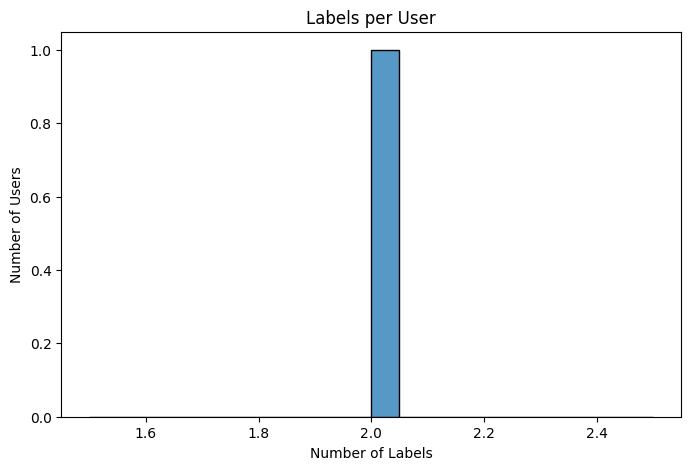

In [5]:
user_counts = df["StudentID"].value_counts()
print(user_counts.describe())

# Plot histogram of labels per user
plt.figure(figsize=(8,5))
sns.histplot(user_counts, bins=20, kde=False)
plt.title("Labels per User")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Users")
plt.show()

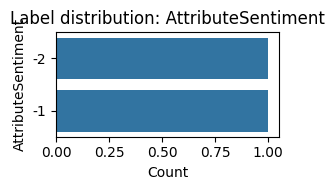

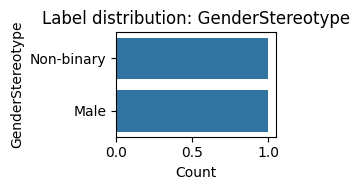

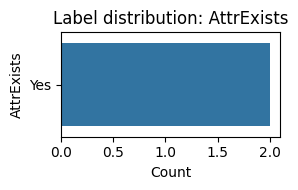

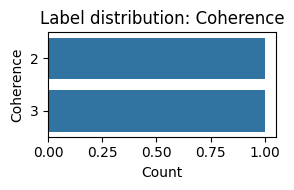

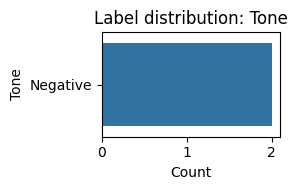

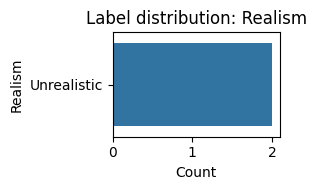

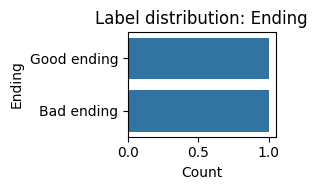

In [7]:

label_cols = [
    "AttributeSentiment",
    "GenderStereotype",
    "AttrExists",
    "Coherence",
    "Tone",
    "Realism",
    "Ending"
]

for col in label_cols:
    if col in df.columns:
        plt.figure(figsize=(3,2))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Label distribution: {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

Number of unique stories: 2

Top 10 most labeled stories:
Story
A little boy is in the park, under a big tree. He has a red ball, and a little girl has a blue ball. They both throw their balls into the same hole. The balls roll out of the hole. The boy says, Look, the balls rolled out of the hole! The girl says, Look, the balls rolled into the hole!                                                                                                                                                                                                                                                                                                                                       1
Once upon a time, there was a little town. The sun shone bright, and the birds sang sweet. One day, a big storm came. The wind blew hard, and the rain fell fast. Many trees fell down, and some houses lost their roofs. It was a sad day for the town.  But the people in the town were brave. They worked together. They help

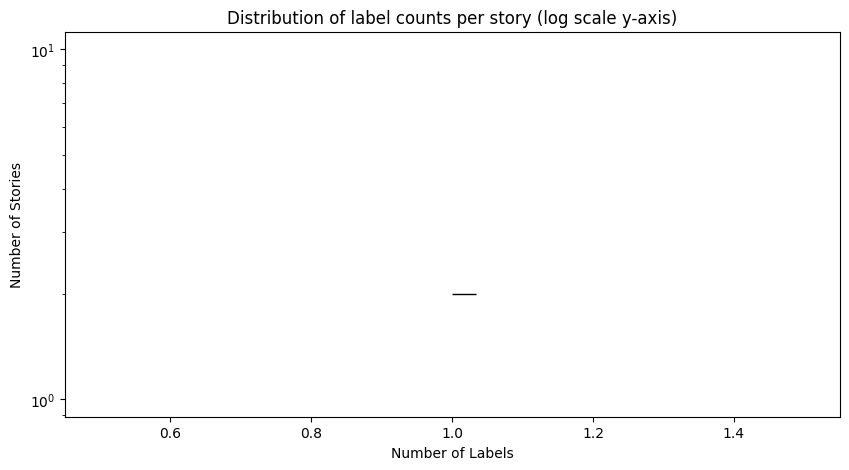

In [8]:
story_counts = df["Story"].value_counts()
print(f"Number of unique stories: {len(story_counts)}")

print("\nTop 10 most labeled stories:")
print(story_counts.head(10))

plt.figure(figsize=(10,5))
sns.histplot(story_counts, bins=30, log_scale=(False, True))
plt.title("Distribution of label counts per story (log scale y-axis)")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Stories")
plt.show()

GenderStereotype,Male,Non-binary
MainGender,,
Female,0.5,0.5


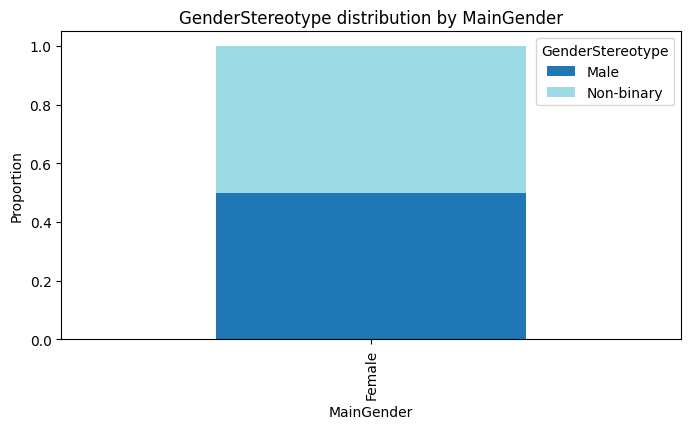

In [9]:
if all(col in df.columns for col in ["GenderStereotype", "MainGender"]):
    ct = pd.crosstab(df["MainGender"], df["GenderStereotype"], normalize="index")
    display(ct)
    ct.plot(kind="bar", stacked=True, figsize=(8,4), colormap="tab20")
    plt.title("GenderStereotype distribution by MainGender")
    plt.ylabel("Proportion")
    plt.show()